# Histogramas de densidades en el halo de materia oscuro


Importar librerias

```{notebook}

```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import numpy as np

Funcion para graficar la densidad de las posiciones de los halos individuales </p>


In [2]:
def cartessian_projection(pos, figname):
      """_summary_

      Args:
            pos (dataframe): _description_
            figname (_type_): _description_

      Returns:
            _type_: _description_
      """
      fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True)
      ax[0].hist2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
      ax[0].set_xlabel(r"x[$kpc$]") 
      ax[0].set_ylabel(r"y[$kpc$]") 
      ax[0].title.set_text("Proyección en xy")
      # ax[0].title.set_fontsize(15)
      
      ax[1].hist2d(pos['y[kpc]'], pos['z[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
      ax[1].set_xlabel(r"y[$kpc$]") 
      ax[1].set_ylabel(r"z[$kpc$]") 
      ax[1].title.set_text("Proyección en yz")
      ax[2].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
      ax[2].set_xlabel(r"x[$kpc$]") 
      ax[2].set_ylabel(r"z[$kpc$]") 
      ax[2].title.set_text("Proyección en xz")
      im_xy = ax[0].imshow(pos, vmin=-0.2, vmax=0.2)
      im_yz = ax[1].imshow(pos, vmin=-0.2, vmax=0.2)
      im_xz = ax[2].imshow(pos, vmin=-0.2, vmax=0.2)
      # im0 = ax[0].imshow(np.log10(np.abs(pos['x[kpc]'])), cmap='plasma')

      fig.subplots_adjust(wspace=0.3)
      # plt.tight_layout()
      fig.suptitle("Histograma de posiciones "+figname, fontsize=20)
      # plt.colorbar(im0, ax=ax[0])
      plt.savefig('./../media/imgs/cartessian_projection/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
      
      plt.colorbar(im_xy, ax=ax[0])
      plt.colorbar(im_yz, ax=ax[1])
      plt.colorbar(im_xz, ax=ax[2])
      plt.show()
      plt.close()
      return 0

def cartessian_projection_zoom(pos, figname):
      fig, ax = plt.subplots(1, 1, figsize=(5,5))
      ax.hist2d(pos[0], pos[1],  bins=np.linspace(-150,150,150), norm=LogNorm())
      # ax.title.set_text("Proyección en"+ figname)
      im = ax.imshow( pos, vmin=-0.2, vmax=0.2)
      fig.suptitle("Histograma de posiciones "+figname, fontsize=15)
      plt.xlim(-10,10)
      plt.ylim(-10,10)
      plt.colorbar(im, ax=ax)
      plt.savefig('./../media/imgs/cartessian_projection_zoom/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
      plt.show()
      plt.close()
      return 0


## Lectura de datos


In [3]:
reference = pd.read_csv('../data/rand_mwb1_110.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
perturbed = pd.read_csv('../data/rand_mwlmc5b0_110.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

df_mw = pd.DataFrame(reference)
df_mw_lmc = pd.DataFrame(perturbed)


<p> Uso de la funcion 'cartesian_projection' y 'cartessian_projection_zoom' para graficar las posiciones de las particulas del halo
<p>





 


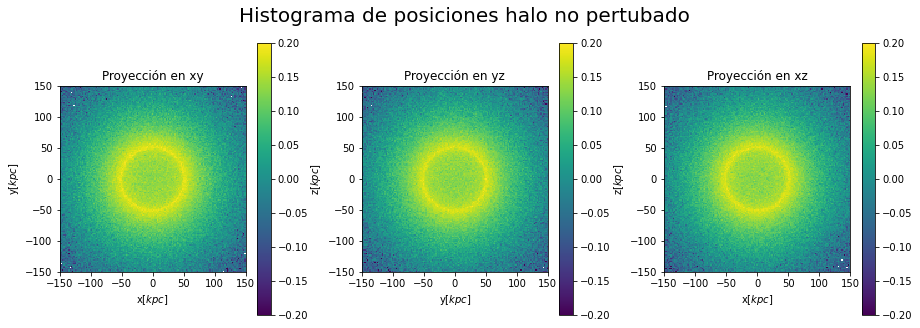

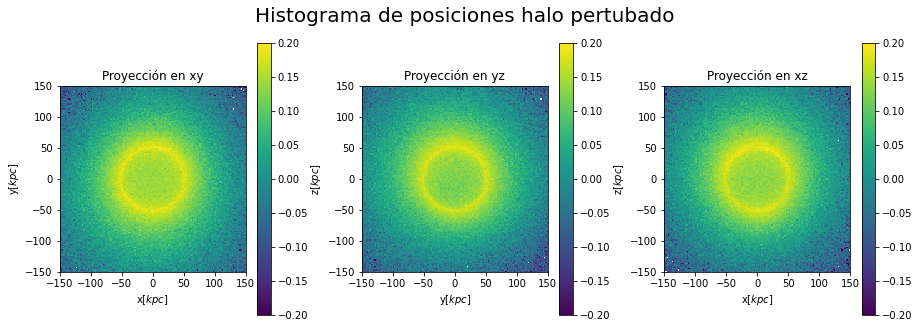

0

In [4]:
cartessian_projection(df_mw, "halo no pertubado")
cartessian_projection(df_mw_lmc, "halo pertubado")


# cartessian_projection_zoom(pos_xy_mw, "mw ")
# cartessian_projection_zoom(pos_xy_mw_lmc, "mw lmc ")

<p> Calculo de los histogramas haciendo uso de la funcion 'histogram2d' de la libreria Numpy </p>


In [5]:


density_xy_1 = np.histogram2d(df_mw['x[kpc]'], df_mw['y[kpc]'],   bins=np.linspace(-150,150,150) )

# for i in density1[0].tolist():
    # print(i,'\n')

# print(type(density1[0].tolist()))

density_xy_2 = np.histogram2d(df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]'],  bins=np.linspace(-150,150,150))



density_yz_1 = np.histogram2d(df_mw['y[kpc]'], df_mw['z[kpc]'], bins=np.linspace(-150,150,150))

density_yz_2 = np.histogram2d(df_mw_lmc['y[kpc]'], df_mw_lmc['z[kpc]'], bins=np.linspace(-150,150,150))

density_xz_1 = np.histogram2d(df_mw['x[kpc]'], df_mw['z[kpc]'], bins=np.linspace(-150,150,150))

density_xz_2 = np.histogram2d(df_mw_lmc['x[kpc]'], df_mw_lmc['z[kpc]'], bins=np.linspace(-150,150,150))


<p>Division de las primeras columnas de cada matriz densidad. </p>


C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\3891115153.py:45: RuntimeWarning: divide by zero encountered in true_divide
  division_xy = (nparticles_xy_2/nparticles_xy_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\3891115153.py:49: RuntimeWarning: divide by zero encountered in true_divide
  division_yz = (nparticles_yz_2/nparticles_yz_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\3891115153.py:53: RuntimeWarning: divide by zero encountered in true_divide
  division_xz = (nparticles_xz_2/nparticles_xz_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\3891115153.py:53: RuntimeWarning: invalid value encountered in true_divide
  division_xz = (nparticles_xz_2/nparticles_xz_1)-1


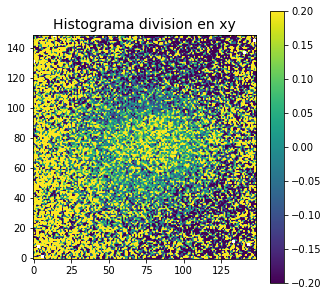

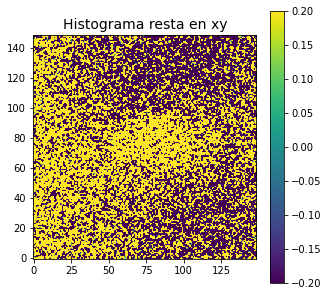

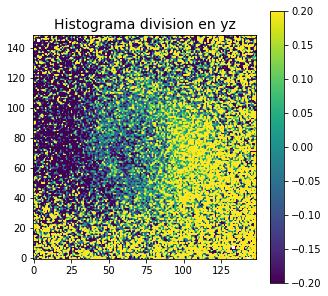

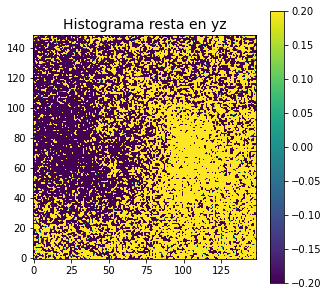

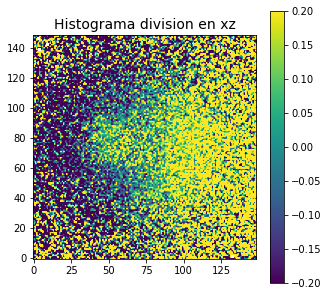

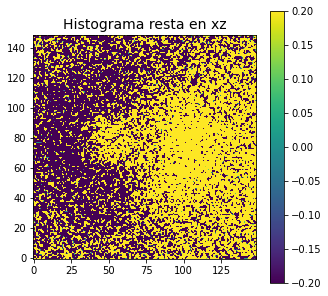

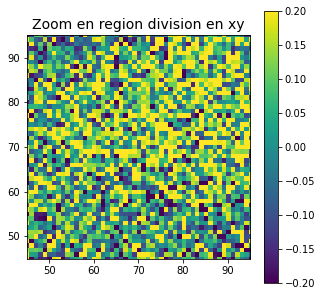

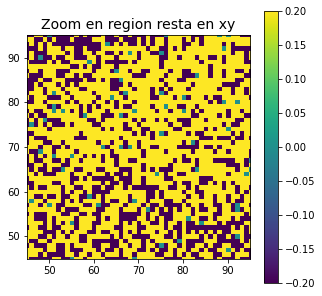

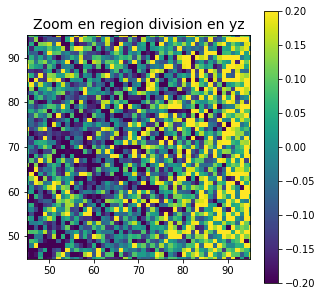

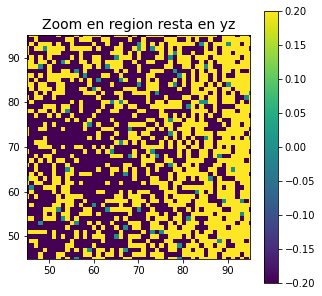

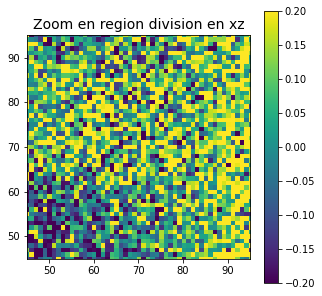

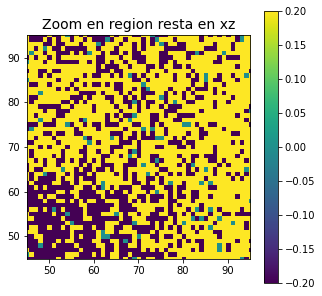

0

In [6]:
nparticles_xy_1 = density_xy_1[0]
nparticles_xy_2 = density_xy_2[0]
nparticles_yz_1 = density_yz_1[0]
nparticles_yz_2 = density_yz_2[0]
nparticles_xz_1 = density_xz_1[0]
nparticles_xz_2 = density_xz_2[0]


def histogram_comparison (density, figname ):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    im = ax.imshow(density, vmin = -0.2, vmax=0.2)
    plt.colorbar(im) 
    plt.title("Histograma "+figname, fontsize=14)
    plt.gca().invert_yaxis()
    plt.savefig('./../media/imgs/histogram_comparison/'+figname +'.jpg', bbox_inches='tight')
    plt.show()
    plt.close()
    return 0


def histogram_comparison_zoom (density, figname ):
    """_summary_

    Args:
        density (_type_): _description_
        figname (_string_): _description_

    Returns:
        _type_: _description_
    """
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    im = ax.imshow(density, vmin = -0.2, vmax=0.2)
    plt.colorbar(im)
    plt.title("Zoom en region "+figname, fontsize=14)
    plt.xlim(45,95)
    plt.ylim(45,95)
    plt.savefig('./../media/imgs/histogram_comparison_zoom/'+figname +'.jpg')
    plt.show()
    plt.close()
    return 0
    

# Comparacion de densidad de particulas
# Componenentes xy
division_xy = (nparticles_xy_2/nparticles_xy_1)-1
resta_xy = nparticles_xy_2-nparticles_xy_1

# Componentes yz
division_yz = (nparticles_yz_2/nparticles_yz_1)-1
resta_yz = nparticles_yz_2-nparticles_yz_1

# Componentes xz
division_xz = (nparticles_xz_2/nparticles_xz_1)-1
resta_xz = nparticles_xz_2-nparticles_xz_1

#Grafic de comparacion y zoom entre la densidad de particulas en el halo perturbado y el halo no perturbado

histogram_comparison(division_xy, "division en xy")
histogram_comparison(resta_xy, "resta en xy")
histogram_comparison(division_yz, "division en yz")
histogram_comparison(resta_yz, "resta en yz")
histogram_comparison(division_xz, "division en xz")
histogram_comparison(resta_xz, "resta en xz")

histogram_comparison_zoom(division_xy, "division en xy")
histogram_comparison_zoom(resta_xy, "resta en xy")
histogram_comparison_zoom(division_yz, "division en yz")
histogram_comparison_zoom(resta_yz, "resta en yz")
histogram_comparison_zoom(division_xz, "division en xz")
histogram_comparison_zoom(resta_xz, "resta en xz")



## Calculo componentes momento angular $$\vec{L}= \vec{r} \times \vec{v}$$


Importar data de las columnas de velocidad en un ndarray


In [7]:


#Position and velocity of halo particles in cartesian coordinates
#Import dataframe into numpy array

pos_mw = np.array([df_mw['x[kpc]'], df_mw['y[kpc]'], df_mw['z[kpc]']])
vel_mw = np.array([df_mw['vx[km/s]'], df_mw['vy[km/s]'], df_mw['vz[km/s]']])
pos_mw_lmc = np.array([df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]'], df_mw_lmc['z[kpc]']])
vel_mw_lmc = np.array([df_mw_lmc['vx[km/s]'], df_mw_lmc['vy[km/s]'], df_mw_lmc['vz[km/s]']])



#Calculate angular momentum components

def angular_momentum(pos, vel):
    """Calculate angular momentum components of particles given position an velocity arrays.

    Args:
        pos (_array_): _Position 3 dim_
        vel (_array_): _Velocities 3 dim_

    Returns:
        _1d array_: Angular momenta in each direction and total mag__
    """
    L = np.cross(pos, vel)
    mag = np.linalg.norm(L, axis=1)
    return L[:,0], L[:,1], L[:,2], mag

Lx1, Ly1, Lz1, L_mag_mw = angular_momentum(pos_mw.T, vel_mw.T)
Lx2, Ly2, Lz2, L_mag_mw_lmc = angular_momentum(pos_mw_lmc.T, vel_mw_lmc.T)




def angular_momentum(pos, vel):
    L = np.cross(pos, vel)
    mag = np.linalg.norm(L, axis=1)
    return L[:,0], L[:,1], L[:,2], mag

Lx1, Ly1, Lz1, L_mag_mw = angular_momentum(pos_mw.T, vel_mw.T)
Lx2, Ly2, Lz2, L_mag_mw_lmc = angular_momentum(pos_mw_lmc.T, vel_mw_lmc.T)

print("Magnitudes de momento angular",L_mag_mw, L_mag_mw_lmc)

# print("Max mag L", np.max(L_mag_mw), np.min(L_mag_mw))
def total_angular_momentum(Lx, Ly, Lz):
    """_Funcion para calcular el momentum angular total_

    Args:
        Lx (_ndarray_): _Componente x del momento angular_
        Ly (_ndarray_): _Componente y del momento angular_
        Lz (_ndarray_): _Componente z del momento angular_

    Returns:
        _type_: _description_
    """
    L_tot = np.array([Lx, Ly, Lz])
    L_len = len(L_tot[0])    
    return np.sum(Lx)/L_len, np.sum(Ly)/L_len, np.sum(Lz)/L_len

L_tot_mw = total_angular_momentum(Lx1, Ly1, Lz1)
L_tot_mw_lmc = total_angular_momentum(Lx2, Ly2, Lz2)
print("L_tot_mw", L_tot_mw)
# print("L_tot_mw_lmc", L_tot_mw_lmc)



Magnitudes de momento angular [ 5905.59617673 18544.62582993 16187.34099707 ... 12628.71341523
 13852.37196113  6790.85871602] [27543.8445742  13500.07381313 10017.83686472 ... 12876.51692168
 12738.12044606 16935.53376214]
L_tot_mw (5.796742930918364, -4.60635409459482, -17.64698125485639)


<p> Histograma yz con valores de x < 10 kpc<p+>

In [8]:
#data processing for the MW non perturbed halo


pos_x_mw = df_mw['x[kpc]'].to_numpy()
pos_y_mw = df_mw['y[kpc]'].to_numpy()
pos_z_mw = df_mw['z[kpc]'].to_numpy()


within_10_kpc_mw = np.where((pos_x_mw > -30) & (pos_x_mw < 30))


#y and z position values for  non perturbed halo in x range -10 to 10 kpc
pos_y_in_x_range_mw = pos_y_mw[within_10_kpc_mw]
pos_z_in_x_range_mw = pos_z_mw[within_10_kpc_mw]

#data processing for the MW+LMC perturbed halo
pos_x_mw_lmc = df_mw_lmc['x[kpc]'].to_numpy()
pos_y_mw_lmc = df_mw_lmc['y[kpc]'].to_numpy()
pos_z_mw_lmc = df_mw_lmc['z[kpc]'].to_numpy()

within_10_kpc_mw_lmc = np.where((pos_x_mw_lmc > -30) & (pos_x_mw_lmc < 30))
pos_y_in_x_range_mw_lmc = pos_y_mw_lmc[within_10_kpc_mw_lmc]
pos_z_in_x_range_mw_lmc = pos_z_mw_lmc[within_10_kpc_mw_lmc]


<p> Histogram plot of yz plane with data indexes of given range <p>

C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\1852832837.py:9: RuntimeWarning: divide by zero encountered in true_divide
  division_yz_in_x = (nparticles_yz_mw_lmc/nparticles_yz_mw)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\1852832837.py:9: RuntimeWarning: invalid value encountered in true_divide
  division_yz_in_x = (nparticles_yz_mw_lmc/nparticles_yz_mw)-1


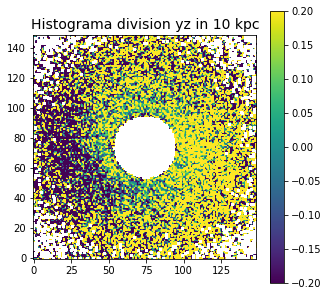

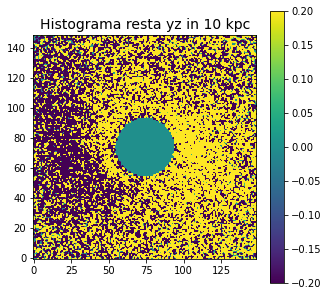

0

In [9]:
density_yz_mw = np.histogram2d(pos_y_in_x_range_mw, pos_z_in_x_range_mw, bins=np.linspace(-150,150,150) )
density_yz_mw_lmc = np.histogram2d(pos_y_in_x_range_mw_lmc, pos_z_in_x_range_mw_lmc,bins=np.linspace(-150,150,150))


nparticles_yz_mw = density_yz_mw[0]
nparticles_yz_mw_lmc = density_yz_mw_lmc[0]

# Comparacion de densidad de particulas
division_yz_in_x = (nparticles_yz_mw_lmc/nparticles_yz_mw)-1
resta_yz_in_x = nparticles_yz_mw_lmc-nparticles_yz_mw
histogram_comparison(division_yz_in_x, "division yz in 10 kpc")
histogram_comparison(resta_yz_in_x, "resta yz in 10 kpc")



In [10]:
#Import dataset of non-equilibrium perturbed and non perturbed systems
df_mw2 = df_mw.to_numpy()
df_mw_lmc2 = df_mw_lmc.to_numpy()

pos_total_mw = df_mw2[:,0:3]
pos_total_mw_lmc = df_mw_lmc2[:,0:3]
pos_mg_mw = np.linalg.norm(pos_total_mw, axis=1)
pos_mg_mw_lmc = np.linalg.norm(pos_total_mw_lmc, axis=1)

#Range and step definition interval for distance and angular momenta
distance =  np.arange(50,250,10)
L = np.arange(9,50000,2500)
#Matrix 2darrays of empty values
hist_rvs_l_mw = np.zeros([len(distance), len(L)])
for i in range(0,len(distance)-1):
    r_index = np.where((pos_mg_mw_lmc > distance[i]) & (pos_mg_mw_lmc < distance[i+1]))
    for j in range(0,len(L)-1):
        Nl = np.where((L_mag_mw_lmc[r_index]> L[j]) & (L_mag_mw_lmc[r_index] < L[j+1]))
        hist_rvs_l_mw[i,j] = np.shape(Nl)[1]

C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_8384\3215026606.py:1: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(hist_rvs_l_mw.T), extent=[50, 250, 0, 50000], aspect='auto', origin='lower', vmin=0, vmax=5,cmap='Greys')


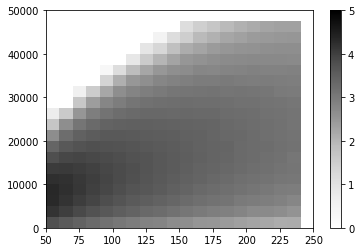

In [11]:

im = plt.imshow(np.log10(hist_rvs_l_mw.T), extent=[50, 250, 0, 50000], aspect='auto', origin='lower', vmin=0, vmax=5,cmap='Greys')
plt.colorbar()



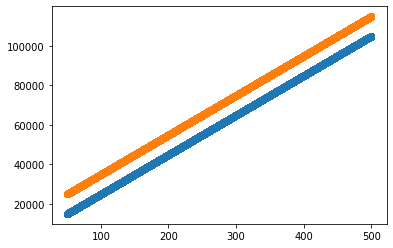

In [64]:
# L_1 = np.where((L_mag_mw_lmc > 5000) & (L_mag_mw_lmc < 10000) &(pos_mg_mw_lmc > 50) & (pos_mg_mw_lmc < 75))
# L_2 = np.where((L_mag_mw_lmc > 10000) & (L_mag_mw_lmc < 15000) &(pos_mg_mw_lmc > 50) & (pos_mg_mw_lmc < 75))
# L_3 = np.where((L_mag_mw_lmc > 15000) & (L_mag_mw_lmc < 20000) &(pos_mg_mw_lmc > 50) & (pos_mg_mw_lmc < 75) )


# m1= (20000-15000)/(75-50)


# print(m)
L_r_1 = m1*pos_mg_mw_lmc + (5000)
L_r_2 = m1*pos_mg_mw_lmc + (15000)

plt.scatter( pos_mg_mw_lmc, L_r_1)
plt.scatter( pos_mg_mw_lmc, L_r_2)

def momentum_regions(pos):
    L_1 = 200*pos + 5000
    L_2 = 200*pos + 15000
    return L_1, L_2


list_index_momentum_region = []

for i in range(len(pos_mg_mw_lmc)):
    line1, line2 = momentum_regions(pos_mg_mw_lmc[i])
    if ((L_mag_mw_lmc[i] > line1 ) & (L_mag_mw_lmc[i] < line2)):
        list_index_momentum_region.append(i)



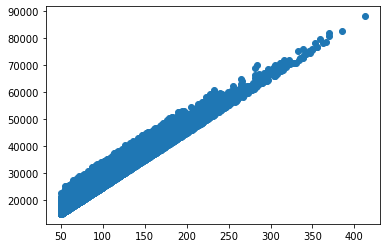

In [65]:
plt.scatter(pos_mg_mw_lmc[list_index_momentum_region], L_mag_mw_lmc[list_index_momentum_region])


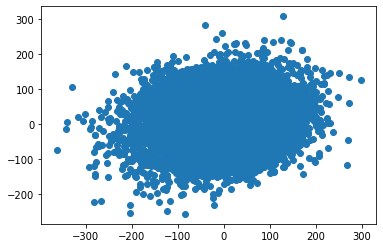

In [68]:
plt.scatter(pos_mw_lmc[1,list_index_momentum_region], pos_mw_lmc[2,list_index_momentum_region])